In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import simulation
import simple
import forced 
import damped
import elastic

In [31]:
# Plotting functions

def compute_cartesian_coords(theta, L=1.0):
    """Convierte ángulos theta a coordenadas cartesianas."""
    x = L * np.sin(theta)
    y = -L * np.cos(theta)
    return x, y


def plot_trajectory(theta, omega, L=1.0, save=False, show=True, imname=""):
    """Grafica la trayectoria de un sistema pendular en 2D."""
    x, y = compute_cartesian_coords(theta, L)

    plt.figure(figsize=(8, 6))
    plt.plot(x[0], y[0], "ro", label="Initial point")  
    plt.plot(x[-1], y[-1], "gx", label="Final point")
    plt.plot(x, y, label="Trajectory")
    plt.title("Pendulum Trajectory")
    plt.xlabel("Position X (m)")
    plt.ylabel("Position Y (m)")
    plt.grid()
    plt.legend()

    if save:
        plt.savefig(f"plots/trajectory{imname}.png", dpi=300)
    if show:
        plt.show()
    plt.close()

def plot_phase_space(theta, omega, save=False, show=True, imname=""):
    """Grafica el espacio fase (theta vs omega)."""
    plt.figure(figsize=(8, 6))
    plt.plot(theta, omega, label=r"$\theta$ vs $\omega$", color="blue")
    plt.xlabel(r"$\theta$ (rad)")
    plt.ylabel(r"$\omega$ (rad/s)")
    plt.title("Phase Space: θ vs ω")
    plt.grid()
    plt.legend()

    if save:
        plt.savefig(f"plots/phase_space{imname}.png", dpi=300)
    if show:
        plt.show()
    plt.close()

def plot_energy_time(t, kin, pot, tot, save=False, show=True, imname=""):
    """Grafica la evolución de la energía en el tiempo."""
    plt.figure(figsize=(8, 6))
    plt.plot(t, kin, label="Kinetic Energy", color="orange")
    plt.plot(t, pot, label="Potential Energy", color="purple")
    plt.plot(t, tot, label="Total Energy", color="black", linestyle="dashed")
    plt.xlabel("Time (s)")
    plt.ylabel("Energy (J)")
    plt.title("System Energy")
    plt.grid()
    plt.legend()

    if save:
        plt.savefig(f"plots/energy_time{imname}.png", dpi=300)
    if show:
        plt.show()
    plt.close()


In [32]:
def load_data(file_path="data/data.dat"):
    """Carga los datos desde el archivo .dat"""
    data = np.loadtxt(file_path, skiprows=1)
    t, theta, omega, E_kin, E_pot, E_tot = data.T
    return t, theta, omega, E_kin, E_pot, E_tot

In [33]:
# System parameters
mass = 1
length = 1

# Simulation parameters
dt = 0.01
t_max = 10.0

# Péndulo simple

## Solución Analítica
El péndulo simple es un sistema mecánico que consiste en una masa puntual suspendida de un hilo inextensible y sin masa que oscila bajo la influencia de la gravedad. Su ecuación de movimiento se deriva de la segunda ley de Newton o de la ecuación de Euler-Lagrange.

### Ecuación de Movimiento

La ecuación de movimiento para el péndulo simple se obtiene aplicando la segunda ley de Newton en coordenadas angulares:

$$ m l \frac{d^2\theta}{dt^2} = -mg \sin\theta $$

Dividiendo por \( ml \), se obtiene la ecuación diferencial:

$$ \frac{d^2\theta}{dt^2} + \frac{g}{l} \sin\theta = 0 $$

Donde:
- $\theta$ es el ángulo de oscilación respecto a la vertical.
- $g$ es la aceleración gravitacional.
- $l$ es la longitud del péndulo.
- $m$ es la masa del péndulo.

### Conversión a un Sistema de Primer Orden

Para resolver la ecuación diferencial numéricamente, la convertimos en un sistema de primer orden definiendo:

$$ \omega = \frac{d\theta}{dt} $$

Entonces, la ecuación de segundo orden se reescribe como el siguiente sistema de ecuaciones de primer orden:

$$\frac{d\theta}{dt} = \omega $$
$$ \frac{d\omega}{dt} = -\frac{g}{l} \sin\theta $$

Este sistema es adecuado para ser resuelto mediante métodos numéricos como Runge-Kutta de cuarto orden.



In [34]:
# Simulación numérica
theta0 = np.pi / 4
omega0 = 0.2
simple_pendulum = simple.SimplePendulum(mass, length, theta0, omega0)
filename = "simple_pendulum"

sp_simulator = simulation.Simulator(simple_pendulum, filename)
sp_simulator.simulate(t_max=t_max, dt=dt)

Simulación completada. Datos guardados en data/simple_pendulum.dat


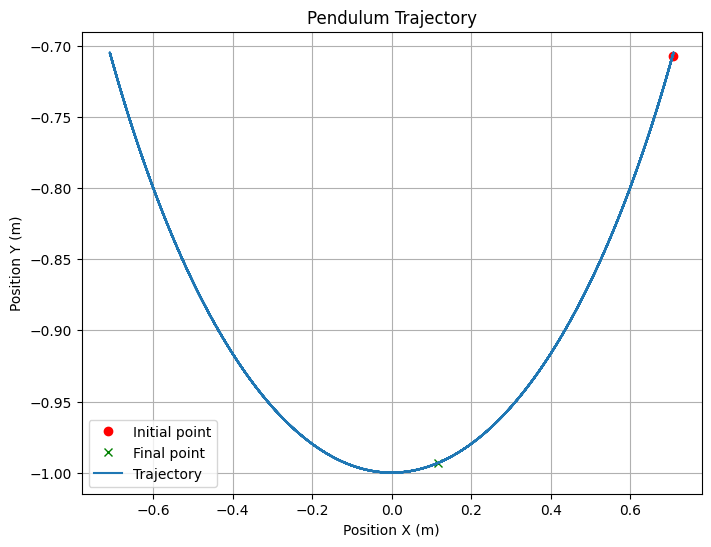

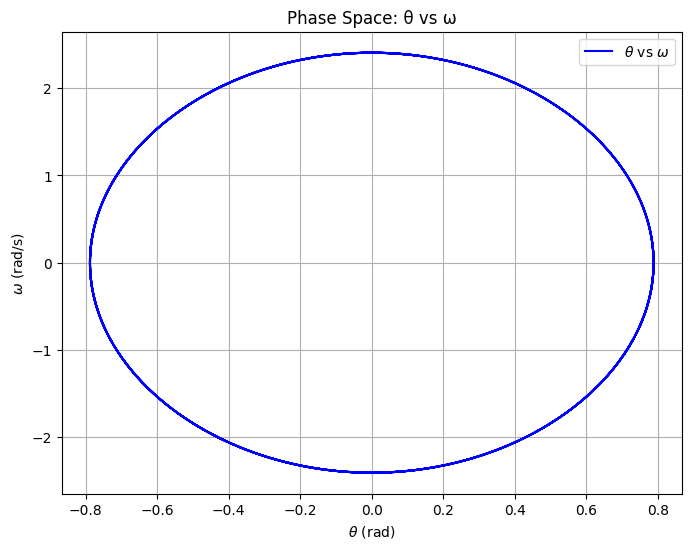

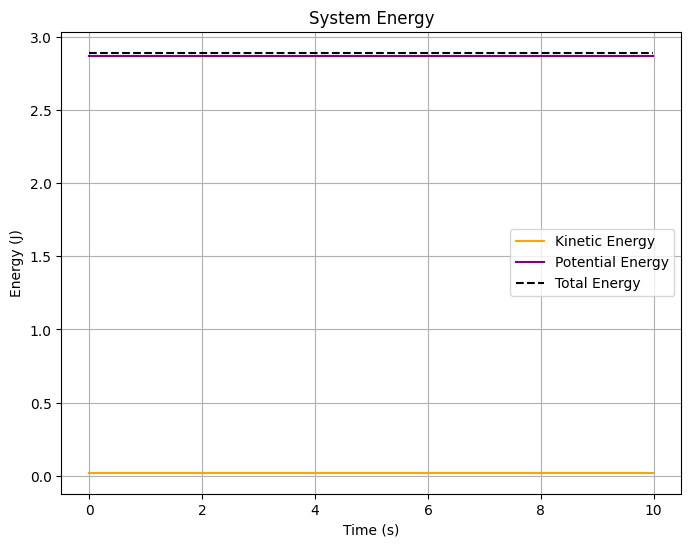

In [ ]:
# Load data
t, theta, omega, E_kin, E_pot, E_tot = load_data("data/simple_pendulum.dat")

plot_trajectory(theta, omega, L=length, save=False, show=True, imname="_simple_pendulum")
plot_phase_space(theta, omega, save=False, show=True, imname="_simple_pendulum")
plot_energy_time(t, E_kin, E_pot, E_tot, save=False, show=True, imname="_simple_pendulum")
